# Hypertension 

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlspdcd/grad_dataset_d.csv
/kaggle/input/mlspdcd/grad_dataset_h.csv
/kaggle/input/mlspdcd/grad_dataset_s.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='white', color_codes=True)

In [4]:
import pandas as pd
stroke = pd.read_csv('/kaggle/input/mlspdcd/grad_dataset_s.csv')
stroke

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85,0,0,1,4,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
41556,0.0,68,0,0,1,4,1,73.31,45.0,0,0
41557,1.0,43,0,0,1,3,1,68.52,26.2,0,0
41558,0.0,27,0,0,1,4,1,102.64,28.3,0,0
41559,1.0,71,0,0,1,2,1,70.92,41.6,0,0


In [5]:
#remove rows with any values that are not finite
stroke = stroke[np.isfinite(stroke).all(1)]

X = stroke.drop('stroke', axis=1)
X

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,63,0,1,1,4,1,228.69,36.6,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0
2,0.0,61,0,0,1,4,1,171.23,34.4,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0
4,1.0,85,0,0,1,4,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
41556,0.0,68,0,0,1,4,1,73.31,45.0,0
41557,1.0,43,0,0,1,3,1,68.52,26.2,0
41558,0.0,27,0,0,1,4,1,102.64,28.3,0
41559,1.0,71,0,0,1,2,1,70.92,41.6,0


In [6]:
y = stroke['stroke'].copy()
y

0        1
1        1
2        1
3        1
4        1
        ..
41556    0
41557    0
41558    0
41559    0
41560    0
Name: stroke, Length: 41558, dtype: int64

1    20922
0    20636
Name: stroke, dtype: int64


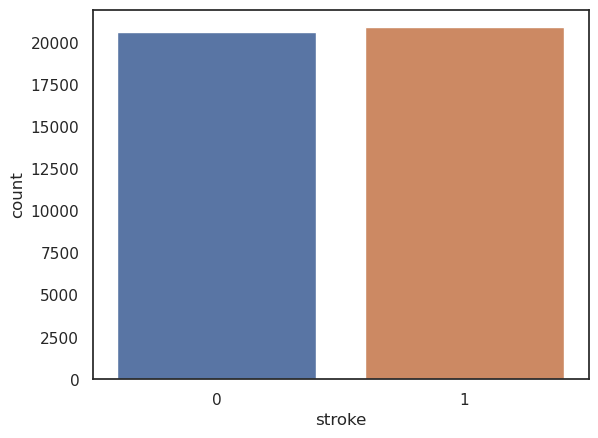

In [7]:
print(stroke['stroke'].value_counts())
ax = sns.countplot(x='stroke', data=stroke)
plt.savefig("stroke.png")

# Remove low variance features

In [8]:
from sklearn.feature_selection import VarianceThreshold
def variance(data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit_transform(data)
    return data[data.columns[selection.get_support(indices=True)]]

X = variance(X)
X

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1.0,63,0,1,1,4,1,228.69,36.6,1
1,1.0,42,0,1,1,4,0,105.92,32.5,0
2,0.0,61,0,0,1,4,1,171.23,34.4,1
3,1.0,41,1,0,1,3,0,174.12,24.0,0
4,1.0,85,0,0,1,4,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
41556,0.0,68,0,0,1,4,1,73.31,45.0,0
41557,1.0,43,0,0,1,3,1,68.52,26.2,0
41558,0.0,27,0,0,1,4,1,102.64,28.3,0
41559,1.0,71,0,0,1,2,1,70.92,41.6,0


# Data splitting

In [9]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape

((33246, 10), (8312, 10))

# bulid classification model

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# K nearest neighbors

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Model performance for Test set
- Accuracy: 0.7032001924927815
- MCC: 0.40743543771098356
- F1 score: 0.7026015069246975


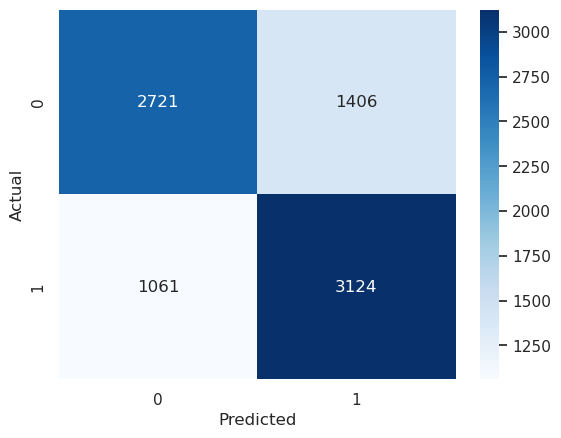

In [12]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {'n_neighbors': [30, 40, 45, 50, 55, 60, 70],
              'weights': ['uniform', 'distance']}

gs_knn = KNeighborsClassifier(n_neighbors=55) # Define classifier

#gs_knn = GridSearchCV(knn, param_grid, cv=5)

gs_knn.fit(X_train.values, y_train.values) # Train model

# Make predictions
y_train_pred = gs_knn.predict(X_train)
y_test_pred = gs_knn.predict(X_test)

# Test set performance
knn_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
knn_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
knn_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
knn_conf = confusion_matrix(y_test, y_test_pred)

print('Model performance for Test set')
print('- Accuracy: %s' % knn_test_accuracy)
print('- MCC: %s' % knn_test_mcc)
print('- F1 score: %s' % knn_test_f1)

# create the heatmap
sns.heatmap(knn_conf, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("knns.png")
plt.show()

# Decision tree

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Model performance for Test set
- Accuracy: 0.7640760346487007
- MCC: 0.5295249434825908
- F1 score: 0.7638687407781519


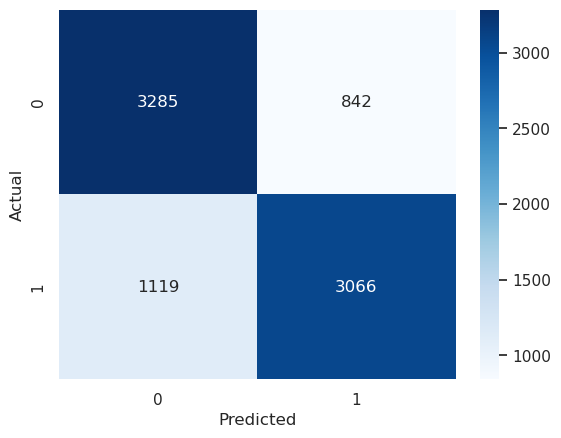

In [13]:
from sklearn.tree import DecisionTreeClassifier


param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
              'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

gs_dt = DecisionTreeClassifier(max_depth=7) # Define classifier

# Create the randomized search object
#gs_dt = GridSearchCV(dt, param_grid, cv=5)

gs_dt.fit(X_train.values, y_train.values) # Train model

# Make predictions
y_train_pred = gs_dt.predict(X_train)
y_test_pred = gs_dt.predict(X_test)

# Test set performance
dt_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
dt_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
dt_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
dt_conf = confusion_matrix(y_test, y_test_pred)

print('Model performance for Test set')
print('- Accuracy: %s' % dt_test_accuracy)
print('- MCC: %s' % dt_test_mcc)
print('- F1 score: %s' % dt_test_f1)
# create the heatmap
sns.heatmap(dt_conf, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("dt.png")
plt.show()

# XGBoost

Model performance for Test set
- Accuracy: 0.9974735322425409
- MCC: 0.9949593442024448
- F1 score: 0.9974734715705411


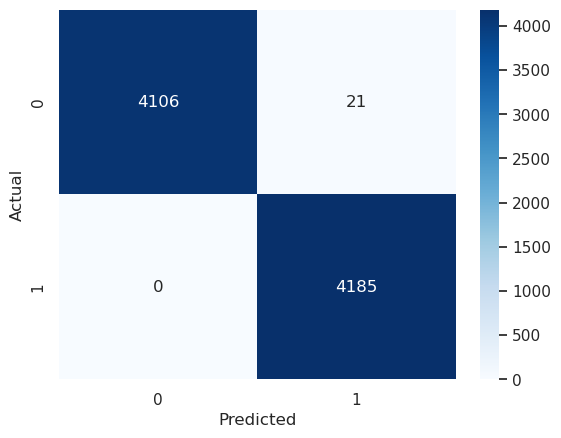

In [14]:
import xgboost as xgb

# Create the randomized search object
param_grid = {'max_depth': [3, 5, 7],
              'learning_rate': [0.1, 0.01, 0.001],
              'n_estimators': [100, 500, 1000],
              'subsample': [0.8, 0.9, 1],
              'colsample_bytree': [0.8, 0.9, 1]}

# Define classifier
gs_xgb = xgb.XGBClassifier()

# Create the randomized search object
#gs_xgb = RandomizedSearchCV(xgb, param_grid, cv=5, n_iter=20)

gs_xgb.fit(X_train.values, y_train.values) # Train model

# Make predictions
y_train_pred = gs_xgb.predict(X_train.values).round()
y_test_pred = gs_xgb.predict(X_test.values).round()

# Test set performance
xg_reg_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
xg_reg_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
xg_reg_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
xg_reg_conf = confusion_matrix(y_test, y_test_pred)

print('Model performance for Test set')
print('- Accuracy: %s' % xg_reg_test_accuracy)
print('- MCC: %s' % xg_reg_test_mcc)
print('- F1 score: %s' % xg_reg_test_f1)

# create the heatmap
sns.heatmap(xg_reg_conf, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("xgboost.png")
plt.show()

# Random Forest

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Model performance for Test set
- Accuracy: 0.7454282964388835
- MCC: 0.501463585649844
- F1: 0.7430826684731121


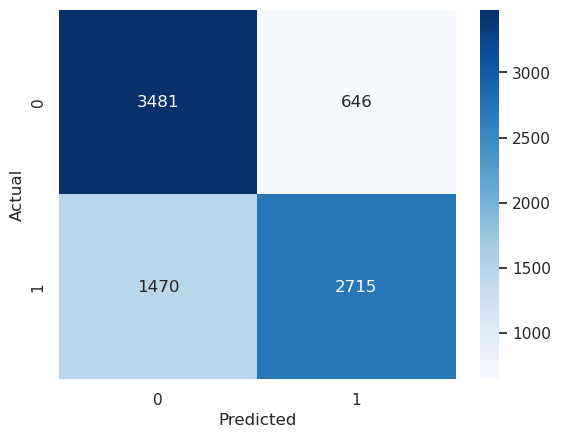

In [15]:
from sklearn.ensemble import RandomForestClassifier
# define the parameter grid
param_dist = {'n_estimators': [10,20,30,50, 100, 200],
              'max_depth': [2,3,4, 5,6, 7,8,9,10]}

# create the model
gs_rf = RandomForestClassifier(n_estimators=200,max_depth=7)

# create the randomized search object
#gs_rf = GridSearchCV(rf, param_dist, cv=5)

gs_rf.fit(X_train.values, y_train.values) # Train model

# Make predictions
y_train_pred = gs_rf.predict(X_train)
y_test_pred = gs_rf.predict(X_test)

# Test set performance
rf_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
rf_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
rf_conf = confusion_matrix(y_test, y_test_pred)

print('Model performance for Test set')
print('- Accuracy: %s' % rf_test_accuracy)
print('- MCC: %s' % rf_test_mcc)
print('- F1: %s' %rf_test_f1)

# create the heatmap
sns.heatmap(rf_conf, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("rf.png")
plt.show()

# Logistic Regression

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Model performance for Test set
- Accuracy: 0.6754090471607315
- MCC: 0.35373907825880047
- F1 score: 0.6744291998594425


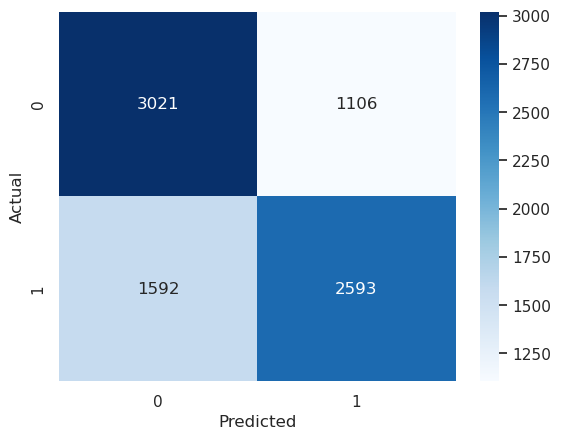

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# 
param_grid = {'hidden_layer_sizes': [(10,), (20,), (30,)],
              'activation': ['relu', 'tanh'],
              'alpha': [0.01, 0.1, 1],
              'learning_rate_init': [0.01, 0.1, 1]}

rs_lr = LogisticRegression(C=0.001,penalty="l2",max_iter=1000)#MLPClassifier(hidden_layer_sizes=(100,),activation="relu",alpha=0.001,learning_rate_init=0.0001)
#rs_mlp = RandomizedSearchCV(mlp, param_grid, n_iter=20, cv=5)
rs_lr.fit(X_train.values, y_train.values)

# Make predictions
y_train_pred = rs_lr.predict(X_train)
y_test_pred = rs_lr.predict(X_test)

# Test set performance
lr_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
lr_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
lr_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
lr_conf = confusion_matrix(y_test, y_test_pred)

print('Model performance for Test set')
print('- Accuracy: %s' % lr_test_accuracy)
print('- MCC: %s' % lr_test_mcc)
print('- F1 score: %s' % lr_test_f1)

# create the heatmap
sns.heatmap(lr_conf, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("lr.png")
plt.show()

# Stacking model

Model performance for Test set
- Accuracy: 0.9989172281039461
- MCC: 0.9978366580529552
- F1 score: 0.9989172186530838


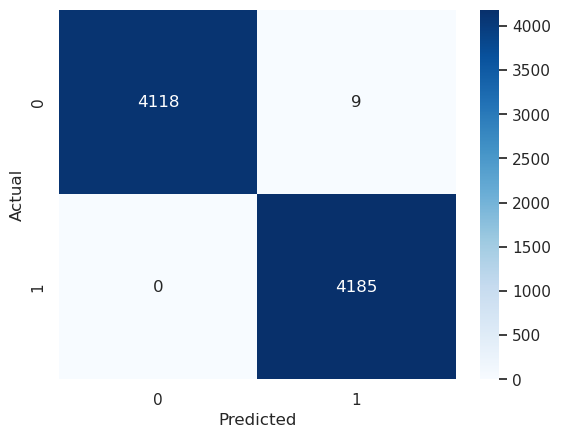

In [24]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

estimator_list = [
    ('knn',gs_knn),
    ('dt',gs_dt),
    ('rf',gs_rf),
    ('lr',rs_lr),
    ('xg',gs_xgb),
    #('gbdt',rs_gb)
]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=MLPClassifier(hidden_layer_sizes=(200,),activation="relu",alpha=0.0001,learning_rate_init=0.0001)
)


# Train stacked model
stack_model.fit(X_train.values, y_train.values)

# Make predictions
y_train_pred = stack_model.predict(X_train.values)
y_test_pred = stack_model.predict(X_test.values)

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score
stack_model_conf = confusion_matrix(y_test, y_test_pred)

print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

# create the heatmap
sns.heatmap(stack_model_conf, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig("stack.png")
plt.show()

# Result

In [ ]:
# list of Accuracy
acc_test_list = {
    'knn':knn_test_accuracy, 'dt': dt_test_accuracy, 'xg': xg_reg_test_accuracy, 'lr': lr_test_accuracy, 'rf': rf_test_accuracy, 'stack': stack_model_test_accuracy
}

# list of MCC
mcc_test_list = {
    'knn':knn_test_mcc, 'dt': dt_test_mcc, 'xg': xg_reg_test_mcc, 'lr': lr_test_mcc, 'rf': rf_test_mcc, 'stack':stack_model_test_mcc
}

# list of F1
f1_test_list = {
    'knn':knn_test_f1, 'dt': dt_test_f1, 'xg': xg_reg_test_f1, 'lr': lr_test_f1, 'rf': rf_test_f1, 'stack':stack_model_test_f1
}

In [23]:
import pandas as pd
acc_df = pd.DataFrame.from_dict(acc_test_list, orient='index', columns=['Accuracy'])
mcc_df = pd.DataFrame.from_dict(mcc_test_list, orient='index', columns=['MCC'])
f1_df = pd.DataFrame.from_dict(f1_test_list, orient='index', columns=['F1'])
df = pd.concat([acc_df, mcc_df, f1_df], axis=1)
df

,Accuracy,MCC,F1
knn,0.703200,0.407435,0.702602
dt,0.764076,0.529525,0.763869
xg,0.997474,0.994959,0.997473
lr,0.675409,0.353739,0.674429
rf,0.745428,0.501464,0.743083
stack,0.998917,0.997837,0.998917



# Save the model to a file


In [22]:
import pickle
file = open('stroke_stack_model.pkl', 'wb')
pickle.dump(stack_model, file)
file.close()